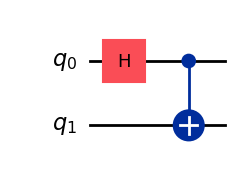

In [3]:
from qiskit import QuantumCircuit

qc=QuantumCircuit(2)

qc.h(0)

qc.cx(0,1)

qc.draw("mpl")

In [4]:
from qiskit.quantum_info import Pauli

ZZ=Pauli('ZZ')
ZI=Pauli('ZI')
IZ=Pauli('IZ')
XX=Pauli('XX')
XI=Pauli('XI')
IX=Pauli('IX')

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService,Estimator,Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli

qc=QuantumCircuit(2)

qc.h(0)

qc.cx(0,1)

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='5f06514a920357c06c8d28a577487d35cdb38135f611474836c73ec641eb6dabab1c274989863b95679552e1b5e7ee32e869cb933bf2efdae6024d14eb9f6cf0'
)


# Run on the least-busy backend you have access to
backend=service.least_busy(simulator=False,operational=True)
# backend = service.get_backend("ibmq_qasm_simulator")

options=Options()
options.resilience_level=1
options.optimization_level=3

# Create an Estimator object
estimator=Estimator(backend,options=options)

pm=generate_preset_pass_manager(backend=backend,optimization_level=3)
isa_circuit=pm.run(qc)
ZZ=Pauli('ZZ')
ZI=Pauli('ZI')
IZ=Pauli('IZ')
XX=Pauli('XX')
XI=Pauli('XI')
IX=Pauli('IX')
# ZZ=ZZ.apply_layout(isa_circuit.layout)
# ZI=ZI.apply_layout(isa_circuit.layout)
# IZ=IZ.apply_layout(isa_circuit.layout)
# XX=XX.apply_layout(isa_circuit.layout)
# XI=XI.apply_layout(isa_circuit.layout)
# IX=IX.apply_layout(isa_circuit.layout)




# Submit the circuit to Estimator
job=estimator.run(circuits=[isa_circuit]*6,observables=[ZZ,ZI,IZ,XX,XI,IX],shots=5000)

job.result()

ValueError: The number of qubits of the 0-th circuit (127) does not match the number of qubits of the 0-th observable (2).